## Designing a classification model in Pycaret

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import Confusionfunc as cf
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


The above line of code is used to call the various libraries which will be utilized throughout this notebook.Each of the libraries listed above are very crutial to the proper implementation or running of the models designed in the workbook as if any of them were missing the codes below wouldn't run hence the notebook would then be rendered useless until the correct library is called 

In [2]:
import pymssql
conn = pymssql.connect('ML-RefVm-981587\MSSQLSERVER2', 'symptom', 'root_2022', 'Symptomdatabase')  
cursor = conn.cursor(as_dict=True)

The code above seeks to call / gather information from SSMS as I did my data clensing via that methodology.The code follows 
the following sequence (Server name/instance"ML-RefVm-981587\MSSQLSERVER2",username"symptom",password "'root_2022",database name "Symptomdatabase")

In [3]:
lst = []
cursor.execute('SELECT * FROM stg.finaldataset;')
for row in cursor:
    lst.append(row)
    
df = pd.DataFrame(lst)

In [ ]:
This code returns all the values from the cleansed dataset/table "finaldataset" and returns it into a dataframe called "df"

In [4]:
df.drop(df.columns[[3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]],axis=1, inplace=True)

In [ ]:
Columns displaying the weigh assigned to each symptom were dropped so as to allow for better shape or reading of the data 
as well as the weights weren't a crucial factor in the design of the classification 

In [5]:
df

Disease_id                                  Disease  \
0          D003                                     AIDS   
1          D003                                     AIDS   
2          D003                                     AIDS   
3          D003                                     AIDS   
4          D003                                     AIDS   
5          D003                                     AIDS   
6          D003                                     AIDS   
7          D003                                     AIDS   
8          D003                                     AIDS   
9          D003                                     AIDS   
10         D003                                     AIDS   
11         D003                                     AIDS   
12         D003                                     AIDS   
13         D003                                     AIDS   
14         D003                                     AIDS   
15         D003                                     AIDS   
16         D003                                     AIDS   
17         D003                                     AIDS   
18         D003                                     AIDS   
19         D003                                     AIDS   
20         D003                                     AIDS   
21        D0029                                 Impetigo   
22        D0029                                 Impetigo   
23        D0029                                 Impetigo   
24        D0029                                 Impetigo   
25        D0029                                 Impetigo   
26        D0029                                 Impetigo   
27        D0017                          Gastroenteritis   
28        D0017                          Gastroenteritis   
29        D0017                          Gastroenteritis   
30        D0017                          Gastroenteritis   
31        D0017                          Gastroenteritis   
32        D0017                          Gastroenteritis   
33        D0017                          Gastroenteritis   
34        D0017                          Gastroenteritis   
35        D0017                          Gastroenteritis   
36        D0017                          Gastroenteritis   
37        D0017                          Gastroenteritis   
38        D0017                          Gastroenteritis   
39         D002                                     Acne   
40         D002                                     Acne   
41         D002                                     Acne   
42         D002                                     Acne   
43         D002                                     Acne   
44         D002                                     Acne   
45        D0012                                   Dengue   
46        D0012                                   Dengue   
47        D0012                                   Dengue   
48        D0012                                   Dengue   
49        D0012                                   Dengue   
50        D0012                                   Dengue   
51        D0032                                 Migraine   
52        D0032                                 Migraine   
53        D0032                                 Migraine   
54        D0032                                 Migraine   
55        D0032                                 Migraine   
56        D0032                                 Migraine   
57        D0032                                 Migraine   
58        D0032                                 Migraine   
59        D0032                                 Migraine   
60        D0032                                 Migraine   
61        D0032                                 Migraine   
62        D0032                                 Migraine   
63        D0032                                 Migraine   
64        D0032                                 Migraine   
65        D0032                              

In [ ]:
Code was used so as to check to ensure that the weight columns were truly dropped

In [120]:
len(df)

4920

In [ ]:
Code was used to ensure that there wasn't any data missing from the dataset

In [9]:
from pycaret.classification import *
s = setup(df, target = 'Disease', session_id = 42)

In [ ]:
The code above is used to kick start the classification by transforming the data (i.e) ensuring that the data is cleaned
which entails ensuring that there are no null values among other things in the dataset. Also important to note is that throught 
the code above users can state which field they want to predict in my case I am predicting the disease field as well as they can 
select a session i.d which basically controlls the randomness of the prediction

In [10]:
best=compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
The code above is used to analyse the dataset to select which model will be best to run the prediction in my case the best 
model would be Naive Bayes. Important to remember every model is bad but some are useful. :)

In [11]:
best

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
The code above displays the best model for my dataset

In [12]:
nb = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
This code is used to create the best model selected and pass it off to a varialbe called  "nb"

In [14]:
predict_model(nb)

Disease_id            Symptom_1       Symptom_2        Symptom_3  \
3306      D0026              fatigue     mood_swings      weight_loss   
3000      D0011  continuous_sneezing          chills          fatigue   
1806      D0023           joint_pain        vomiting          fatigue   
2664      D0038               chills        vomiting          fatigue   
4446      D0029            skin_rash      high_fever          blister   
...         ...                  ...             ...              ...   
4744       D004             vomiting  yellowish_skin   abdominal_pain   
1867      D0041              fatigue          cramps         bruising   
3907      D0036               chills         fatigue            cough   
3551      D0033           joint_pain       neck_pain        knee_pain   
431        D006      muscle_weakness      stiff_neck  swelling_joints   

                 Symptom_4              Symptom_5  \
3306          restlessness               sweating   
3000                 cough             high_fever   
1806            dark_urine                 nausea   
2664           weight_loss                  cough   
4446  red_sore_around_nose      yellow_crust_ooze   
...                    ...                    ...   
4744   swelling_of_stomach  distention_of_abdomen   
1867               obesity           swollen_legs   
3907            high_fever         breathlessness   
3551        hip_joint_pain        swelling_joints   
431     movement_stiffness        painful_walking   

                           Symptom_6                Symptom_7  \
3306                       diarrhoea          fast_heart_rate   
3000                        headache      swelled_lymph_nodes   
1806                loss_of_appetite           abdominal_pain   
2664                      high_fever           breathlessness   
4446                               0                        0   
...                              ...                      ...   
4744  history_of_alcohol_consumption           fluid_overload   
1867           swollen_blood_vessels  prominent_veins_on_calf   
3907                        sweating                  malaise   
3551                 painful_walking                        0   
431                                0                        0   

              Symptom_8         Symptom_9  ...           Symptom_12  \
3306   excessive_hunger   muscle_weakness  ...                    0   
3000            malaise            phlegm  ...       sinus_pressure   
1806  yellowing_of_eyes                 0  ...                    0   
2664           sweating  loss_of_appetite  ...  swelled_lymph_nodes   
4446                  0                 0  ...                    0   
...                 ...               ...  ...                  ...   
4744                  0                 0  ...                    0   
1867                  0                 0  ...                    0   
3907             phlegm        chest_pain  ...                    0   
3551                  0                 0  ...                    0   
431                   0                 0  ...                    0   

      Symptom_13  Symptom_14  Symptom_15       Symptom_16   Symptom_17  \
3306           0           0           0                0            0   
3000  runny_nose  congestion  chest_pain    loss_of_smell  muscle_pain   
1806           0           0           0                0            0   
2664     malaise      phlegm  chest_pain  blood_in_sputum            0   
4446           0           0           0                0            0   
...          ...         ...         ...              ...          ...   
4744           0           0           0                0            0   
1867           0           0           0                0            0   
3907           0           0           0                0            0   
3551           0           0           0                0            0   
431            0           0           0   

In [ ]:
This code is where the magic happends / where it is that the data/target actually gets predicted as can be seen above in my case 
the two most important columns to look out for are "Disease" and "Prediction_label"

In [18]:
tuned_nb=tune_model(nb)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
Here the model is tuned or tested by 10 folds or 10 times to see how accurate the model is 

In [19]:
df_nb=predict_model(tuned_nb)

In [ ]:
The code above is used to predict based on the tuned model 

In [20]:
df_nb

Disease_id            Symptom_1       Symptom_2        Symptom_3  \
3306      D0026              fatigue     mood_swings      weight_loss   
3000      D0011  continuous_sneezing          chills          fatigue   
1806      D0023           joint_pain        vomiting          fatigue   
2664      D0038               chills        vomiting          fatigue   
4446      D0029            skin_rash      high_fever          blister   
...         ...                  ...             ...              ...   
4744       D004             vomiting  yellowish_skin   abdominal_pain   
1867      D0041              fatigue          cramps         bruising   
3907      D0036               chills         fatigue            cough   
3551      D0033           joint_pain       neck_pain        knee_pain   
431        D006      muscle_weakness      stiff_neck  swelling_joints   

                 Symptom_4              Symptom_5  \
3306          restlessness               sweating   
3000                 cough             high_fever   
1806            dark_urine                 nausea   
2664           weight_loss                  cough   
4446  red_sore_around_nose      yellow_crust_ooze   
...                    ...                    ...   
4744   swelling_of_stomach  distention_of_abdomen   
1867               obesity           swollen_legs   
3907            high_fever         breathlessness   
3551        hip_joint_pain        swelling_joints   
431     movement_stiffness        painful_walking   

                           Symptom_6                Symptom_7  \
3306                       diarrhoea          fast_heart_rate   
3000                        headache      swelled_lymph_nodes   
1806                loss_of_appetite           abdominal_pain   
2664                      high_fever           breathlessness   
4446                               0                        0   
...                              ...                      ...   
4744  history_of_alcohol_consumption           fluid_overload   
1867           swollen_blood_vessels  prominent_veins_on_calf   
3907                        sweating                  malaise   
3551                 painful_walking                        0   
431                                0                        0   

              Symptom_8         Symptom_9  ...           Symptom_12  \
3306   excessive_hunger   muscle_weakness  ...                    0   
3000            malaise            phlegm  ...       sinus_pressure   
1806  yellowing_of_eyes                 0  ...                    0   
2664           sweating  loss_of_appetite  ...  swelled_lymph_nodes   
4446                  0                 0  ...                    0   
...                 ...               ...  ...                  ...   
4744                  0                 0  ...                    0   
1867                  0                 0  ...                    0   
3907             phlegm        chest_pain  ...                    0   
3551                  0                 0  ...                    0   
431                   0                 0  ...                    0   

      Symptom_13  Symptom_14  Symptom_15       Symptom_16   Symptom_17  \
3306           0           0           0                0            0   
3000  runny_nose  congestion  chest_pain    loss_of_smell  muscle_pain   
1806           0           0           0                0            0   
2664     malaise      phlegm  chest_pain  blood_in_sputum            0   
4446           0           0           0                0            0   
...          ...         ...         ...              ...          ...   
4744           0           0           0                0            0   
1867           0           0           0                0            0   
3907           0           0           0                0            0   
3551           0           0           0                0            0   
431            0           0           0   

In [21]:
predict_model(nb)

Disease_id            Symptom_1       Symptom_2        Symptom_3  \
3306      D0026              fatigue     mood_swings      weight_loss   
3000      D0011  continuous_sneezing          chills          fatigue   
1806      D0023           joint_pain        vomiting          fatigue   
2664      D0038               chills        vomiting          fatigue   
4446      D0029            skin_rash      high_fever          blister   
...         ...                  ...             ...              ...   
4744       D004             vomiting  yellowish_skin   abdominal_pain   
1867      D0041              fatigue          cramps         bruising   
3907      D0036               chills         fatigue            cough   
3551      D0033           joint_pain       neck_pain        knee_pain   
431        D006      muscle_weakness      stiff_neck  swelling_joints   

                 Symptom_4              Symptom_5  \
3306          restlessness               sweating   
3000                 cough             high_fever   
1806            dark_urine                 nausea   
2664           weight_loss                  cough   
4446  red_sore_around_nose      yellow_crust_ooze   
...                    ...                    ...   
4744   swelling_of_stomach  distention_of_abdomen   
1867               obesity           swollen_legs   
3907            high_fever         breathlessness   
3551        hip_joint_pain        swelling_joints   
431     movement_stiffness        painful_walking   

                           Symptom_6                Symptom_7  \
3306                       diarrhoea          fast_heart_rate   
3000                        headache      swelled_lymph_nodes   
1806                loss_of_appetite           abdominal_pain   
2664                      high_fever           breathlessness   
4446                               0                        0   
...                              ...                      ...   
4744  history_of_alcohol_consumption           fluid_overload   
1867           swollen_blood_vessels  prominent_veins_on_calf   
3907                        sweating                  malaise   
3551                 painful_walking                        0   
431                                0                        0   

              Symptom_8         Symptom_9  ...           Symptom_12  \
3306   excessive_hunger   muscle_weakness  ...                    0   
3000            malaise            phlegm  ...       sinus_pressure   
1806  yellowing_of_eyes                 0  ...                    0   
2664           sweating  loss_of_appetite  ...  swelled_lymph_nodes   
4446                  0                 0  ...                    0   
...                 ...               ...  ...                  ...   
4744                  0                 0  ...                    0   
1867                  0                 0  ...                    0   
3907             phlegm        chest_pain  ...                    0   
3551                  0                 0  ...                    0   
431                   0                 0  ...                    0   

      Symptom_13  Symptom_14  Symptom_15       Symptom_16   Symptom_17  \
3306           0           0           0                0            0   
3000  runny_nose  congestion  chest_pain    loss_of_smell  muscle_pain   
1806           0           0           0                0            0   
2664     malaise      phlegm  chest_pain  blood_in_sputum            0   
4446           0           0           0                0            0   
...          ...         ...         ...              ...          ...   
4744           0           0           0                0            0   
1867           0           0           0                0            0   
3907           0           0           0                0            0   
3551           0           0           0                0            0   
431            0           0           0   

In [ ]:
The code above is used to predict the test data with the Naive Bayes model

In [22]:

prediction = predict_model(nb, data=df)
prediction



Disease_id       Symptom_1          Symptom_2   Symptom_3  \
0          D003  muscle_wasting  patches_in_throat  high_fever   
1          D003  muscle_wasting  patches_in_throat  high_fever   
2          D003  muscle_wasting  patches_in_throat  high_fever   
3          D003  muscle_wasting  patches_in_throat  high_fever   
4          D003  muscle_wasting  patches_in_throat  high_fever   
...         ...             ...                ...         ...   
4915       D003  muscle_wasting  patches_in_throat  high_fever   
4916       D003  muscle_wasting  patches_in_throat  high_fever   
4917       D003  muscle_wasting  patches_in_throat  high_fever   
4918       D003  muscle_wasting  patches_in_throat  high_fever   
4919       D003  muscle_wasting  patches_in_throat  high_fever   

                   Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8  \
0     extra_marital_contacts         0         0         0         0   
1     extra_marital_contacts         0         0         0         0   
2     extra_marital_contacts         0         0         0         0   
3     extra_marital_contacts         0         0         0         0   
4     extra_marital_contacts         0         0         0         0   
...                      ...       ...       ...       ...       ...   
4915  extra_marital_contacts         0         0         0         0   
4916  extra_marital_contacts         0         0         0         0   
4917  extra_marital_contacts         0         0         0         0   
4918  extra_marital_contacts         0         0         0         0   
4919  extra_marital_contacts         0         0         0         0   

     Symptom_9  ... Symptom_12 Symptom_13 Symptom_14 Symptom_15 Symptom_16  \
0            0  ...          0          0          0          0          0   
1            0  ...          0          0          0          0          0   
2            0  ...          0          0          0          0          0   
3            0  ...          0          0          0          0          0   
4            0  ...          0          0          0          0          0   
...        ...  ...        ...        ...        ...        ...        ...   
4915         0  ...          0          0          0          0          0   
4916         0  ...          0          0          0          0          0   
4917         0  ...          0          0          0          0          0   
4918         0  ...          0          0          0          0          0   
4919         0  ...          0          0          0          0          0   

     Symptom_17 Send_to_Doctor Disease prediction_label prediction_score  
0             0              1    AIDS             AIDS              1.0  
1             0              1    AIDS             AIDS              1.0  
2             0              1    AIDS             AIDS              1.0  
3             0              1    AIDS             AIDS              1.0  
4             0              1    AIDS             AIDS              1.0  
...         ...            ...     ...              ...              ...  
4915          0              1    AIDS             AIDS              1.0  
4916          0              1    AIDS             AIDS              1.0  
4917          0              1    AIDS             AIDS              1.0  
4918          0              1    AIDS             AIDS              1.0  
4919          0              1    AIDS             AIDS              1.0  

[4920 rows x 22 columns]

In [ ]:
This code is used tyo test the Naive Bayes predict model against the entire 
dataset

In [23]:
save_model(nb,'nb_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\biauser\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=Fals...
                                              'Symptom_6', 'Symptom_7'],
                                     transformer=LeaveOneOutEncoder(cols=['Disease_id',
                                                                          'Symptom_1',
                                                 

In [ ]:
The code above is used to save the model to a pipeline which will be easy to access
and used to analyse/ predict similar data 

In [24]:
loaded_model = load_model('nb_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\biauser\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=Fals...
                                             'Symptom_6', 'Symptom_7'],
                                    transformer=LeaveOneOutEncoder(cols=['Disease_id',
                                                                         'Symptom_1',
        

In [ ]:
After saving the pipeline we are loading it back up to the current Jupyter Notebook which we are currently in 

## Recoding user input  to test against the prediction model

In [25]:
var_ng=input ("Please type in Symptom you would like to check ")
 

Please type in Symptom you would like to check itching


In [26]:
var_ng1=input ("Please type in Symptom you would like to check ")

Please type in Symptom you would like to check fatigue


In [27]:
var_rt=input("please enter wheter or not doctor is needed")

please enter wheter or not doctor is needed1


The code above is used to get users to enter information they would like to see returned from the dataset which will in turn be used to test the model created above 

In [45]:
Symptom1=df.loc[df.loc[:,'Symptom_1']==var_ng,:]

In [46]:
Symptom2=Symptom1.loc[Symptom1.loc[:,'Symptom_2']==var_ng1,: ] 

In [47]:
Pred=Symptom2.loc[Symptom2.loc[:,'Send_to_Doctor']==var_rt,: ] 

The code above is used to compare the user input above against the database and return the sub-dataset below which will be used to test the model created 

In [48]:
#type(Pred)
Pred


Disease_id      Disease Symptom_1 Symptom_2       Symptom_3  \
3738      D0021  Hepatitis B   itching   fatigue  yellowish_skin   
3739      D0021  Hepatitis B   itching   fatigue  yellowish_skin   
3740      D0021  Hepatitis B   itching   fatigue  yellowish_skin   
3741      D0021  Hepatitis B   itching   fatigue  yellowish_skin   
3742      D0021  Hepatitis B   itching   fatigue  yellowish_skin   
...         ...          ...       ...       ...             ...   
3973      D0021  Hepatitis B   itching   fatigue        lethargy   
3974      D0021  Hepatitis B   itching   fatigue        lethargy   
3975      D0021  Hepatitis B   itching   fatigue        lethargy   
3976      D0021  Hepatitis B   itching   fatigue        lethargy   
3977      D0021  Hepatitis B   itching   fatigue        lethargy   

           Symptom_4         Symptom_5       Symptom_6     Symptom_7  \
3738      dark_urine  loss_of_appetite  abdominal_pain  yellow_urine   
3739      dark_urine  loss_of_appetite  abdominal_pain  yellow_urine   
3740      dark_urine  loss_of_appetite  abdominal_pain  yellow_urine   
3741      dark_urine  loss_of_appetite  abdominal_pain  yellow_urine   
3742      dark_urine  loss_of_appetite  abdominal_pain  yellow_urine   
...              ...               ...             ...           ...   
3973  yellowish_skin        dark_urine  abdominal_pain  yellow_urine   
3974  yellowish_skin        dark_urine  abdominal_pain  yellow_urine   
3975  yellowish_skin        dark_urine  abdominal_pain  yellow_urine   
3976  yellowish_skin        dark_urine  abdominal_pain  yellow_urine   
3977  yellowish_skin        dark_urine  abdominal_pain  yellow_urine   

              Symptom_8 Symptom_9                   Symptom_10  \
3738  yellowing_of_eyes   malaise  receiving_blood_transfusion   
3739  yellowing_of_eyes   malaise  receiving_blood_transfusion   
3740  yellowing_of_eyes   malaise  receiving_blood_transfusion   
3741  yellowing_of_eyes   malaise  receiving_blood_transfusion   
3742  yellowing_of_eyes   malaise  receiving_blood_transfusion   
...                 ...       ...                          ...   
3973  yellowing_of_eyes   malaise  receiving_blood_transfusion   
3974  yellowing_of_eyes   malaise  receiving_blood_transfusion   
3975  yellowing_of_eyes   malaise  receiving_blood_transfusion   
3976  yellowing_of_eyes   malaise  receiving_blood_transfusion   
3977  yellowing_of_eyes   malaise  receiving_blood_transfusion   

                          Symptom_11 Symptom_12 Symptom_13 Symptom_14  \
3738  receiving_unsterile_injections          0          0          0   
3739  receiving_unsterile_injections          0          0          0   
3740  receiving_unsterile_injections          0          0          0   
3741  receiving_unsterile_injections          0          0          0   
3742  receiving_unsterile_injections          0          0          0   
...                              ...        ...        ...        ...   
3973  receiving_unsterile_injections          0          0          0   
3974  receiving_unsterile_injections          0          0          0   
3975  receiving_unsterile_injections          0          0          0   
3976  receiving_unsterile_injections          0          0          0   
3977  receiving_unsterile_injections          0          0          0   

     Symptom_15 Symptom_16 Symptom_17 Send_to_Doctor  
3738          0          0          0              1  
3739          0          0          0              1  
3740          0          0          0              1  
3741          0          0          0              1  
3742          0          0          0              1  
...         ...        ...        ...            ...  
3973          0          0          0              1  
3974          0          0          0              1  
3975          0          0          0              1  
3976          0          0          0              1  
3977          0          0          0           

In [50]:
Pred.Disease.unique()

array(['Hepatitis B', 'Chicken pox', 'Jaundice'], dtype=object)

In [ ]:
This line of code is used to return the unique value ("Disease")found in the dataset requested by the user whhich are ('Hepatitis B', 'Chicken pox', 'Jaundice')

In [51]:
n_model=load_model('nb_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
The above code is used to call the model / used to load the model to test against the user input and save it to a variable called
n_model and the code belowis used to show information about the pipeline as may be seen below 

In [24]:
n_model



Pipeline(memory=FastMemory(location=C:\Users\biauser\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(include=[], transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Disease_id', 'Symptom_1',
                                             'Symptom_2', 'Symptom_3',
                                             'Symp...
                ('rest_encoding',
                 TransformerWrapper(include=['Disease_id', 'Symptom_1',
                                             'Symptom_2', 'Symptom_3',
                                             'Symptom_4', 'Symptom_5',
                                             'Symptom_6', 'Symptom_7'],
                                    transformer=LeaveOneOutEncoder(cols=['Disease_id',
                                                                         'Symptom_1',
                                                                         'Symptom_2',
                                                                         'Symptom_3',
                                                                         'Symptom_4',
                                                                         'Symptom_5',
                                                                         'Symptom_6',
                                                                         'Symptom_7'],
                                                                   handle_missing='return_nan',
                                                                   random_state=42))),
                ('trained_model', GaussianNB())])

In [52]:
npredict=predict_model(n_model,raw_score=False,data=Pred)

The code above is used to implement the predict_model against the user input recorded as "Pred" above and pass it into a variable npredict which is then implemented or ran below to ensure that the model is working properly as well as the Accuracy,Kappa and MCC listed above  

In [80]:
npredict

Disease_id Symptom_1 Symptom_2       Symptom_3       Symptom_4  \
3738      D0021   itching   fatigue  yellowish_skin      dark_urine   
3739      D0021   itching   fatigue  yellowish_skin      dark_urine   
3740      D0021   itching   fatigue  yellowish_skin      dark_urine   
3741      D0021   itching   fatigue  yellowish_skin      dark_urine   
3742      D0021   itching   fatigue  yellowish_skin      dark_urine   
...         ...       ...       ...             ...             ...   
3973      D0021   itching   fatigue        lethargy  yellowish_skin   
3974      D0021   itching   fatigue        lethargy  yellowish_skin   
3975      D0021   itching   fatigue        lethargy  yellowish_skin   
3976      D0021   itching   fatigue        lethargy  yellowish_skin   
3977      D0021   itching   fatigue        lethargy  yellowish_skin   

             Symptom_5       Symptom_6     Symptom_7          Symptom_8  \
3738  loss_of_appetite  abdominal_pain  yellow_urine  yellowing_of_eyes   
3739  loss_of_appetite  abdominal_pain  yellow_urine  yellowing_of_eyes   
3740  loss_of_appetite  abdominal_pain  yellow_urine  yellowing_of_eyes   
3741  loss_of_appetite  abdominal_pain  yellow_urine  yellowing_of_eyes   
3742  loss_of_appetite  abdominal_pain  yellow_urine  yellowing_of_eyes   
...                ...             ...           ...                ...   
3973        dark_urine  abdominal_pain  yellow_urine  yellowing_of_eyes   
3974        dark_urine  abdominal_pain  yellow_urine  yellowing_of_eyes   
3975        dark_urine  abdominal_pain  yellow_urine  yellowing_of_eyes   
3976        dark_urine  abdominal_pain  yellow_urine  yellowing_of_eyes   
3977        dark_urine  abdominal_pain  yellow_urine  yellowing_of_eyes   

     Symptom_9  ... Symptom_12 Symptom_13 Symptom_14 Symptom_15 Symptom_16  \
3738   malaise  ...          0          0          0          0          0   
3739   malaise  ...          0          0          0          0          0   
3740   malaise  ...          0          0          0          0          0   
3741   malaise  ...          0          0          0          0          0   
3742   malaise  ...          0          0          0          0          0   
...        ...  ...        ...        ...        ...        ...        ...   
3973   malaise  ...          0          0          0          0          0   
3974   malaise  ...          0          0          0          0          0   
3975   malaise  ...          0          0          0          0          0   
3976   malaise  ...          0          0          0          0          0   
3977   malaise  ...          0          0          0          0          0   

     Symptom_17 Send_to_Doctor      Disease prediction_label prediction_score  
3738          0              1  Hepatitis B      Hepatitis B              1.0  
3739          0              1  Hepatitis B      Hepatitis B              1.0  
3740          0              1  Hepatitis B      Hepatitis B              1.0  
3741          0              1  Hepatitis B      Hepatitis B              1.0  
3742          0              1  Hepatitis B      Hepatitis B              1.0  
...         ...            ...          ...              ...              ...  
3973          0              1  Hepatitis B      Hepatitis B              1.0  
3974          0              1  Hepatitis B      Hepatitis B              1.0  
3975          0              1  Hepatitis B      Hepatitis B              1.0  
3976          0              1  Hepatitis B      Hepatitis B              1.0  
3977          0              1  Hepatitis B      Hepatitis B              1.0  

[120 rows x 22 columns]

In [53]:
Symp_prediction = npredict.Disease.unique().tolist()
Symp_prediction

['Hepatitis B', 'Chicken pox', 'Jaundice']

In [ ]:
The above code is used to display the unique values in the dataset which will be used in the design of the confusion matrix

In [81]:
cm = confusion_matrix(npredict.Disease, npredict.prediction_label, labels=Symp_prediction)
cm

array([[108,   0,   0],
       [  0,   6,   0],
       [  0,   0,   6]], dtype=int64)

In [ ]:
The above code is used to map the  actual Disease to the predicted disease and this will be used in the confussion matrix

## Designing Charts 

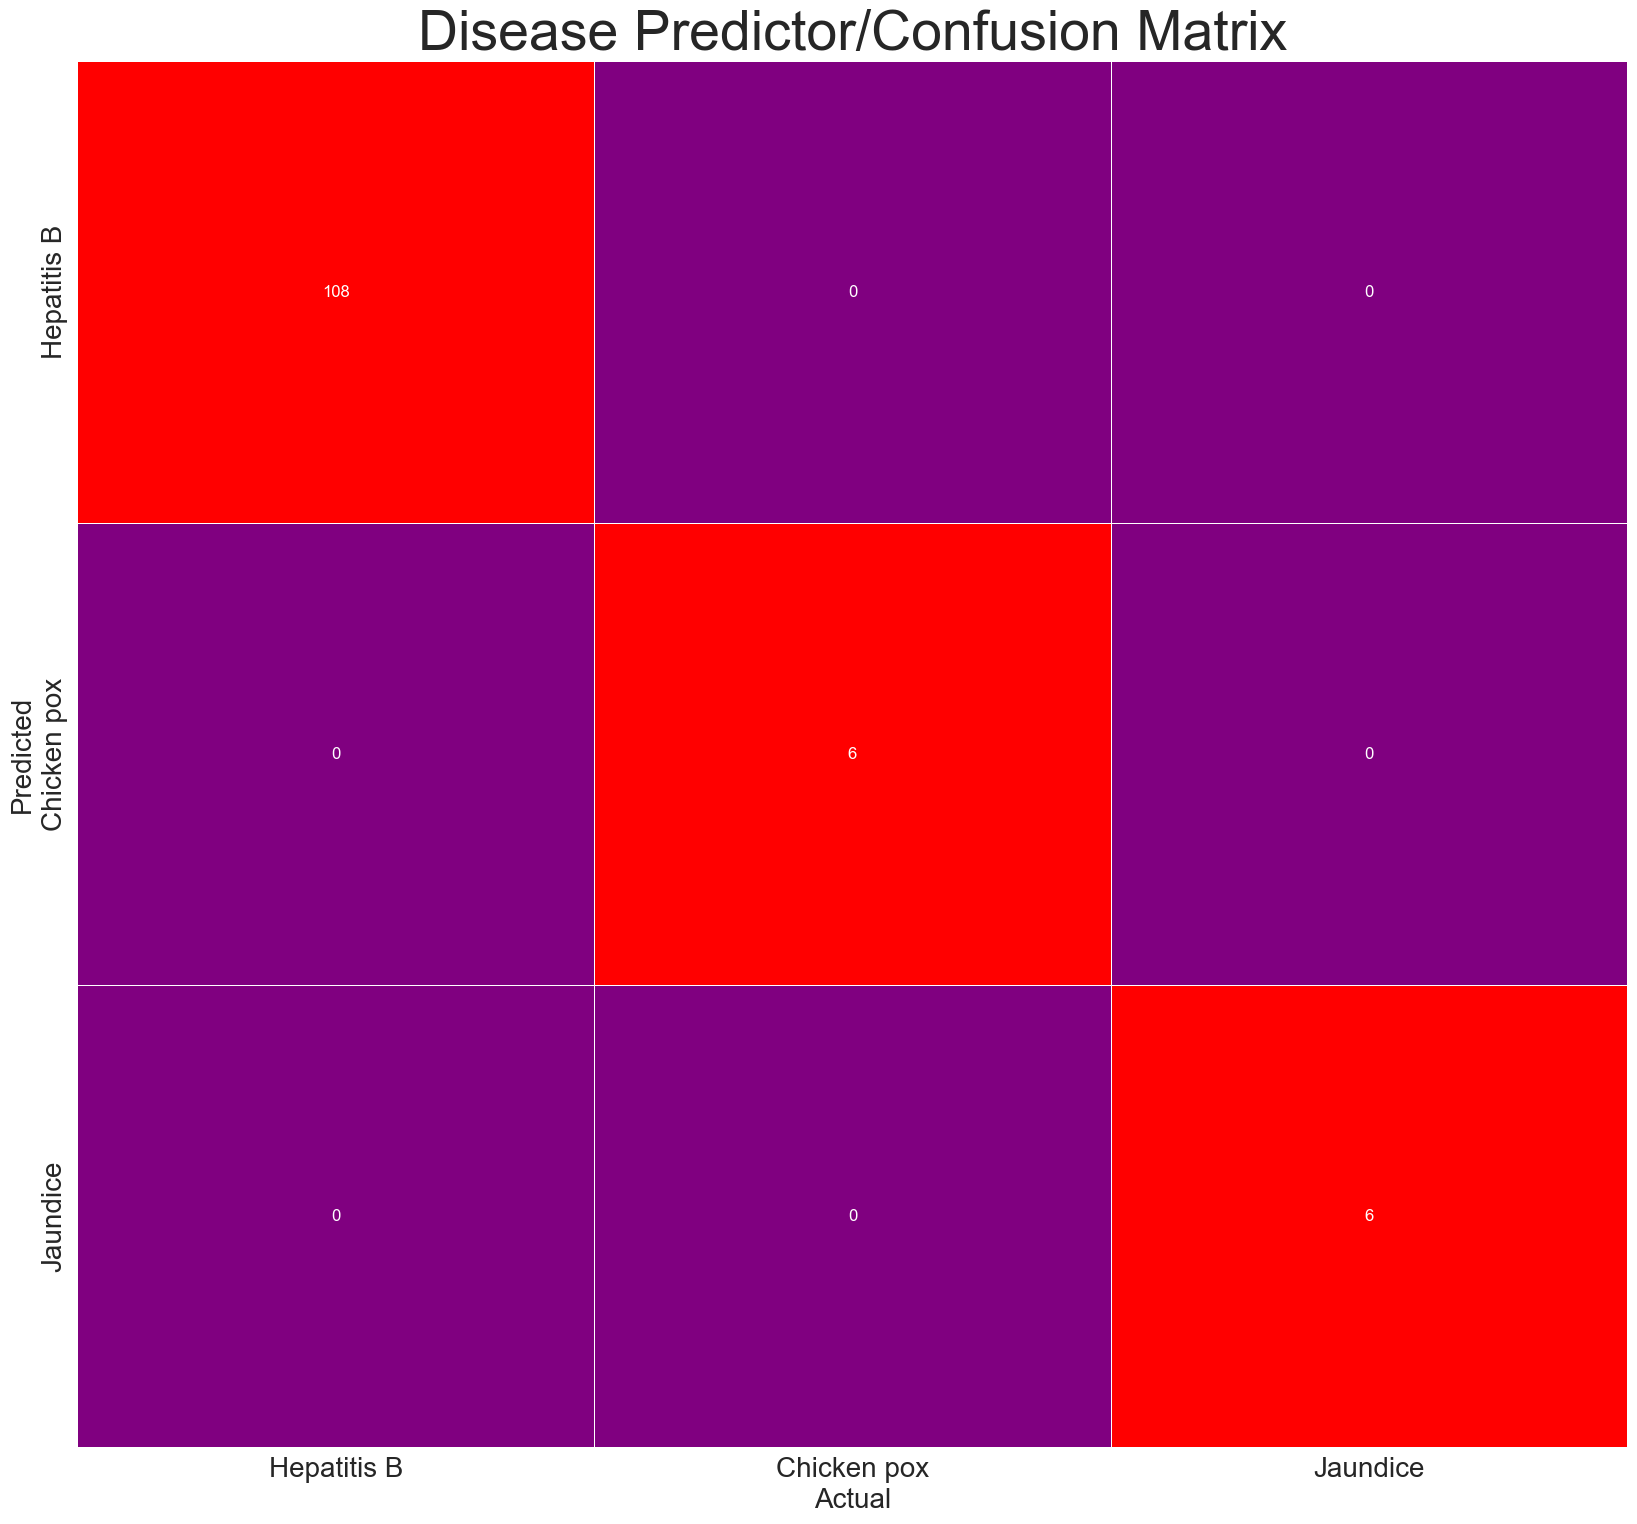

In [93]:
off_diag_mask = np.eye(*cm.shape, dtype=bool)
plt.figure(figsize=(20,18))
sns.heatmap(data=cm, annot=True, xticklabels=Symp_prediction, yticklabels=Symp_prediction, mask=~off_diag_mask ,cmap=['Red'],
                     cbar=False,fmt='g', linewidths=.6,)
sns.heatmap(data=cm, annot=True, xticklabels=Symp_prediction, yticklabels=Symp_prediction,mask=off_diag_mask, cmap=['Purple'],
                      cbar=False,fmt='g', linewidths=.6,)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Disease Predictor/Confusion Matrix',fontsize=40)
plt.show()

The code above is used to design or implement the confusion matrix based on the user input . The chart was created through the use of seaborn and matplotlib which were inpemented above

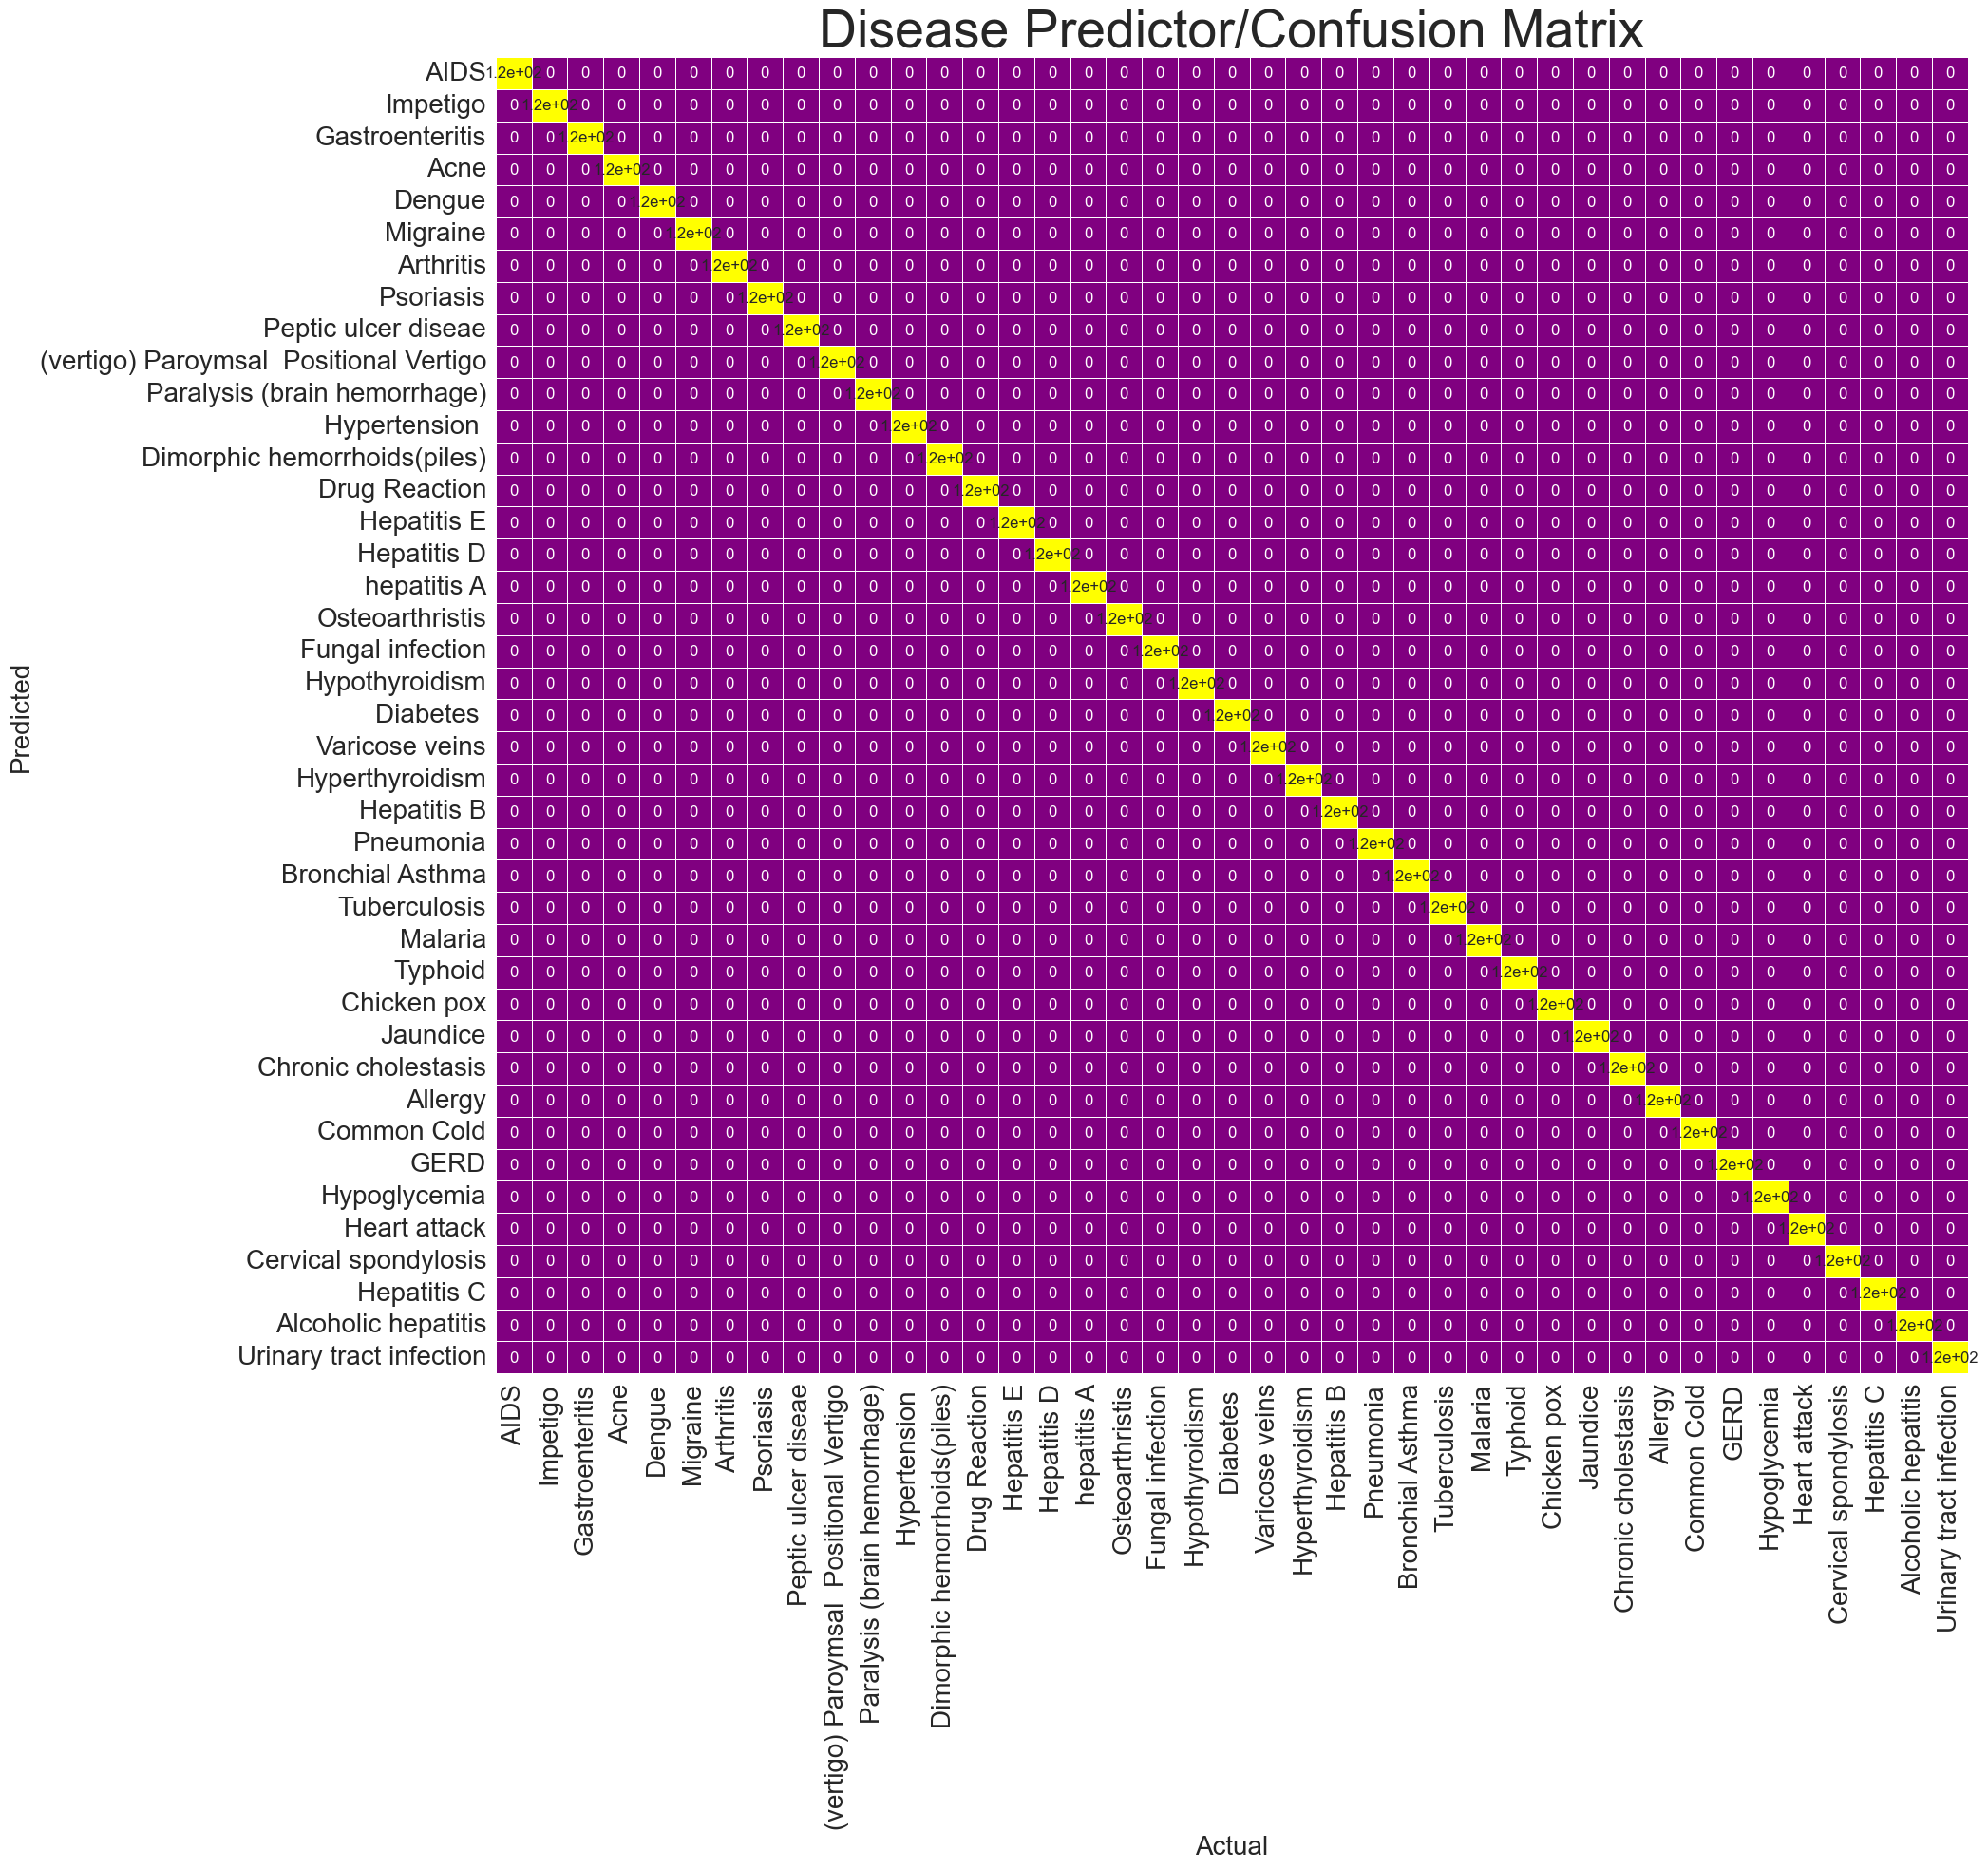

In [119]:
cf.sns_cm(prediction.Disease,prediction.prediction_label)


The chart / confusion matrix above was implemented through the use of a function and it displays the prediction of disease for the entire dataset 